In [2]:
import pandas as pd
import random

In [3]:
data = pd.read_csv('train.csv')

In [4]:
selected_cols = [
    'fare_amount','pickup_datetime','pickup_longitude','pickup_latitude',
    'dropoff_longitude','dropoff_latitude','passenger_count'
]

dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

chunksize = 1_000_000
sample_frac = 0.01     

samples = []

for chunk in pd.read_csv("train.csv",
                         usecols=selected_cols,
                         dtype=dtypes,
                         parse_dates=['pickup_datetime'],
                         chunksize=chunksize):

    samples.append(chunk.sample(frac=sample_frac, random_state=42))

df = pd.concat(samples, ignore_index=True)

print("Final sample shape:", df.shape)


Final sample shape: (554239, 7)


In [5]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.3,2009-09-26 18:31:00+00:00,-73.977081,40.764362,-73.983040,40.779598,2
1,8.5,2014-11-09 22:52:54+00:00,-73.976768,40.752071,-73.996628,40.742874,1
2,23.5,2015-05-16 13:14:31+00:00,-73.982376,40.773331,-73.999031,40.760406,1
3,20.5,2012-12-24 13:18:00+00:00,-73.981865,40.762360,-74.007668,40.703178,5
4,5.0,2013-09-28 22:22:40+00:00,-73.977722,40.753227,-73.985626,40.756191,1
...,...,...,...,...,...,...,...
554234,8.1,2010-10-22 10:40:51+00:00,-73.955971,40.782055,-73.960182,40.762897,1
554235,8.5,2009-09-22 12:15:58+00:00,-74.005936,40.740047,-73.989426,40.757751,2
554236,9.0,2015-05-08 19:55:26+00:00,-74.006195,40.742702,-73.987465,40.747311,2
554237,4.9,2010-06-29 22:41:44+00:00,-73.967819,40.759892,-73.970795,40.753971,1


In [6]:
test_df = pd.read_csv('test.csv' , dtype = dtypes , parse_dates=['pickup_datetime'])



In [7]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


## Explore dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554239 entries, 0 to 554238
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        554239 non-null  float32            
 1   pickup_datetime    554239 non-null  datetime64[ns, UTC]
 2   pickup_longitude   554239 non-null  float32            
 3   pickup_latitude    554239 non-null  float32            
 4   dropoff_longitude  554238 non-null  float32            
 5   dropoff_latitude   554238 non-null  float32            
 6   passenger_count    554239 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,554239.000000,554239.000000,554239.000000,554238.000000,554238.000000,554239.000000
mean,11.343991,-72.487396,39.933582,-72.492401,39.926418,1.681251
std,9.737592,14.643139,10.460296,13.976317,11.105179,1.304871
min,-53.000000,-3414.132812,-835.845337,-3414.132812,-3458.701416,0.000000
25%,6.000000,-73.992096,40.734928,-73.991394,40.733936,1.000000
50%,8.500000,-73.981812,40.752659,-73.980133,40.753147,1.000000
75%,12.500000,-73.967102,40.767136,-73.963577,40.768082,2.000000
max,315.000000,3061.947998,3348.681885,3211.579834,3333.304688,9.000000


In [10]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:10:47+0000', tz='UTC'),
 Timestamp('2015-06-30 23:56:12+0000', tz='UTC'))

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [12]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [13]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

## Prepare Dataset For Training

### Split Training & Validation Set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
len(train_df), len(val_df)

(443391, 110848)

### Extract Inputs and Outputs

In [17]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col = 'fare_amount'

In [19]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [20]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [21]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


### Train & Evaluate Baseline Model

In [22]:
train_inputs = train_inputs.dropna()

In [23]:
train_targets = train_targets.dropna()

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_model = LinearRegression()

In [28]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [29]:
train_preds = linear_model.predict(train_inputs)
train_preds

array([11.290077, 11.28987 , 11.374612, ..., 11.45857 , 11.627345,
       11.289865], dtype=float32)

In [30]:
val_preds = linear_model.predict(val_inputs)
val_preds

array([11.289275, 11.374228, 11.289866, ..., 11.289927, 11.289772,
       11.289889], dtype=float32)

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [39]:
rmse_train = np.sqrt(mean_squared_error(train_targets, train_preds))
print(f"Train RMSE: {rmse_train:.4f}")

Train RMSE: 9.7510


In [40]:
val_preds = linear_model.predict(val_inputs)
rmse_val = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f"Validation RMSE: {rmse_val:.4f}")

Validation RMSE: 9.6859


the max value of the taxi fair is 12 and the rsme is very close to it so the relation can't be linear and so this model is useless

#### Feature Engineering

**spliting date**

In [41]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [42]:
add_dateparts(train_df, 'pickup_datetime')

In [43]:
add_dateparts(val_df, 'pickup_datetime')

In [44]:
add_dateparts(test_df, 'pickup_datetime')

In [49]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
45278,12.5,2012-12-19 01:40:43+00:00,-73.985596,40.738579,-73.991211,40.695965,1,2012,12,19,2,1
259886,6.5,2009-05-08 08:05:41+00:00,-73.989159,40.759060,-73.970924,40.764599,1,2009,5,8,4,8
232196,14.1,2009-07-01 22:12:00+00:00,-74.003876,40.733524,-73.964653,40.687889,2,2009,7,1,2,22
122684,11.0,2012-11-03 10:07:00+00:00,-73.982269,40.768288,-73.989601,40.741341,1,2012,11,3,5,10
543738,7.7,2010-09-11 21:09:00+00:00,-73.965469,40.806122,-73.974373,40.787743,1,2010,9,11,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,7.5,2014-11-08 00:35:00+00:00,-73.971672,40.782204,-73.951515,40.786278,1,2014,11,8,5,0
259178,22.5,2011-07-01 13:39:00+00:00,-73.959404,40.783234,-74.017174,40.705372,1,2011,7,1,4,13
365838,10.1,2009-01-02 00:08:00+00:00,-73.952530,40.772285,-73.977058,40.744465,3,2009,1,2,4,0
131932,9.3,2011-03-03 19:03:00+00:00,-73.989479,40.741821,-73.989426,40.716385,5,2011,3,3,3,19


**Adding Distance**

In [50]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [51]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [52]:
add_trip_distance(train_df)

In [53]:
add_trip_distance(val_df)

In [54]:
add_trip_distance(test_df)

In [55]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
45278,12.5,2012-12-19 01:40:43+00:00,-73.985596,40.738579,-73.991211,40.695965,1,2012,12,19,2,1,4.758988
259886,6.5,2009-05-08 08:05:41+00:00,-73.989159,40.759060,-73.970924,40.764599,1,2009,5,8,4,8,1.653792
232196,14.1,2009-07-01 22:12:00+00:00,-74.003876,40.733524,-73.964653,40.687889,2,2009,7,1,2,22,6.052724
122684,11.0,2012-11-03 10:07:00+00:00,-73.982269,40.768288,-73.989601,40.741341,1,2012,11,3,5,10,3.057287
543738,7.7,2010-09-11 21:09:00+00:00,-73.965469,40.806122,-73.974373,40.787743,1,2010,9,11,5,21,2.175380


In [58]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [56]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [59]:
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

In [63]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
45278,12.5,2012-12-19 01:40:43+00:00,-73.985596,40.738579,-73.991211,40.695965,1,2012,12,19,2,1,4.758988,18.961779,13.352345,15.460572,9.566762,2.428437
259886,6.5,2009-05-08 08:05:41+00:00,-73.989159,40.759060,-73.970924,40.764599,1,2009,5,8,4,8,1.653792,21.251032,8.270399,19.067469,1.768373,6.645359
232196,14.1,2009-07-01 22:12:00+00:00,-74.003876,40.733524,-73.964653,40.687889,2,2009,7,1,2,22,6.052724,16.555340,12.494288,17.683357,10.169888,4.698278
122684,11.0,2012-11-03 10:07:00+00:00,-73.982269,40.768288,-73.989601,40.741341,1,2012,11,3,5,10,3.057287,21.004280,10.502167,16.605145,4.777373,3.622608
543738,7.7,2010-09-11 21:09:00+00:00,-73.965469,40.806122,-73.974373,40.787743,1,2010,9,11,5,21,2.175380,23.197598,8.530978,20.078217,1.320035,8.869760


##### Remove Outliers

In [64]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [65]:
train_df = remove_outliers(train_df)

In [ ]:
val_df = remove_outliers(val_df)

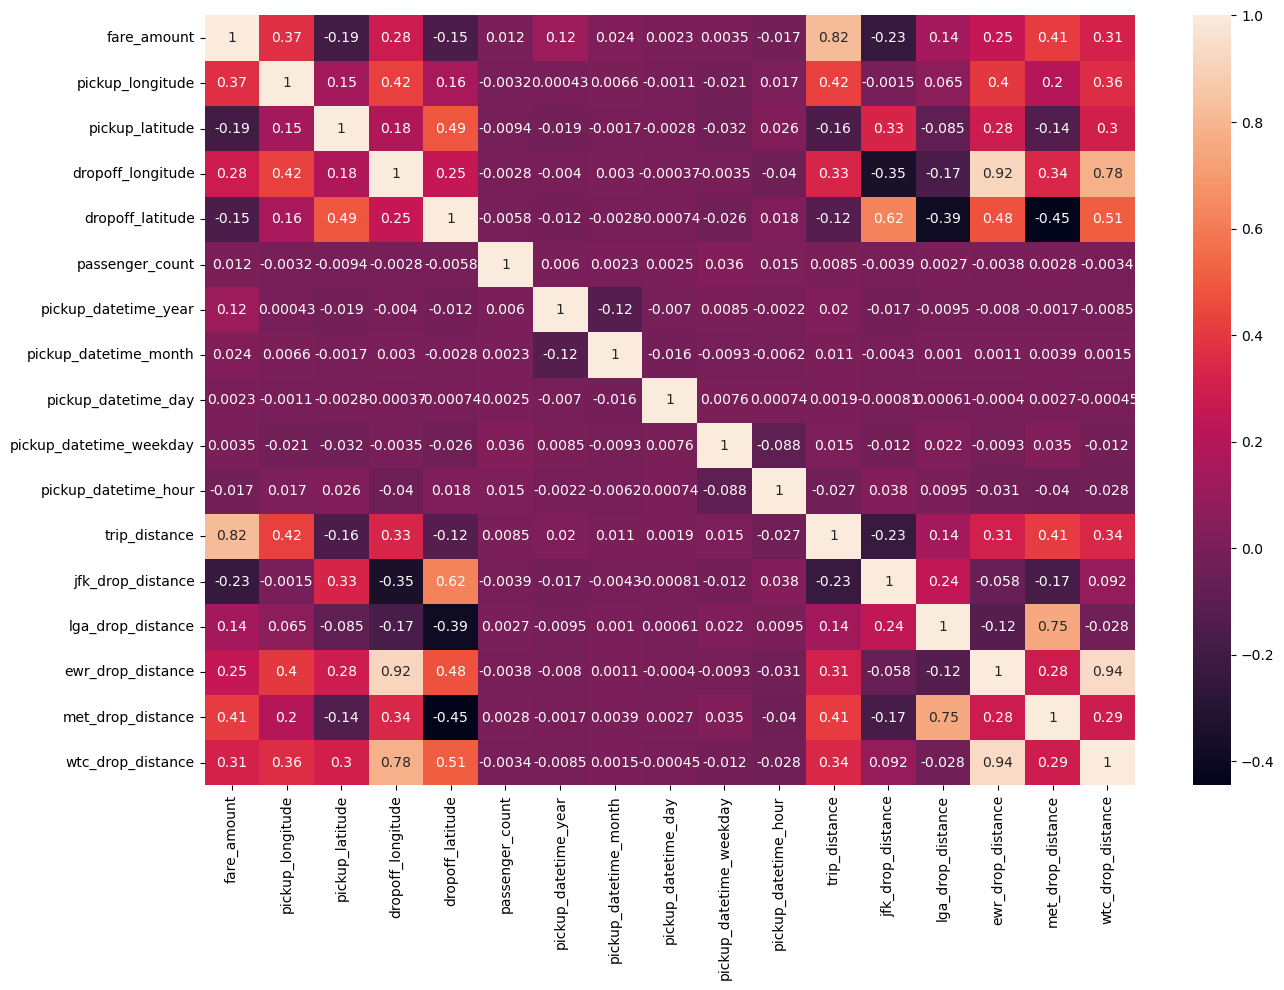

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()


Now we turn the data to parquet type to make it easier and faster to train and test models

In [69]:
train_df.to_parquet('train.parquet')
val_df.to_parquet('val.parquet')

## Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Ridge Regression
- Random Forests
- Gradient Boosting

### Split Inputs & Targets

In [79]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [118]:
input_cols = ['pickup_latitude', 'pickup_longitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [119]:
target_col = 'fare_amount'

In [120]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [121]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [122]:
test_inputs = test_df[input_cols]

In [123]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
    val_preds = model.predict(val_inputs)
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}")
    return train_rmse, val_rmse, train_preds, val_preds

### Ridge Regression

In [124]:
from sklearn.linear_model import Ridge

In [125]:
model1 = Ridge(random_state=42)

In [126]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: total: 78.1 ms
Wall time: 68.3 ms


Ridge(random_state=42)

In [131]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [132]:
evaluate(model1)

Train RMSE: 5.1339
Validation RMSE: 5.2857


(np.float64(5.133919392684135),
 np.float64(5.285749633784255),
 array([15.2371719 ,  5.23819243, 16.39794439, ...,  9.18330675,
         9.21085673, 14.41830324]),
 array([38.21498828, 11.66807293,  7.62077927, ...,  4.66764648,
         7.76796904, 10.91511407]))

### Random Forest

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [135]:
model2.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [136]:
evaluate(model2)

Train RMSE: 3.5776
Validation RMSE: 3.8895


(np.float64(3.577633127095343),
 np.float64(3.889473921074967),
 array([14.70423381,  7.15697776, 16.13727775, ...,  9.7242297 ,
        10.03756747, 14.2013854 ]),
 array([58.96389284, 11.20074107,  8.62467947, ...,  5.04008957,
         6.88866798, 11.0715531 ]))

In [139]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv('sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [140]:
predict_and_submit(model2, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.711796
1,2015-01-27 13:08:24.0000003,10.818138
2,2011-10-08 11:53:44.0000002,5.040090
3,2012-12-01 21:12:12.0000002,8.521175
4,2012-12-01 21:12:12.0000003,13.935896
...,...,...
9909,2015-05-10 12:37:51.0000002,8.766061
9910,2015-01-12 17:05:51.0000001,12.217415
9911,2015-04-19 20:44:15.0000001,55.260596
9912,2015-01-31 01:05:19.0000005,22.180405


### Gradient Boosting

In [145]:
from xgboost import XGBRegressor

In [175]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [176]:
model3.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [177]:
evaluate(model3)


Train RMSE: 3.1592
Validation RMSE: 3.6664


(np.float64(3.1592222514520603),
 np.float64(3.6663671862514517),
 array([15.327984,  7.841005, 16.446293, ...,  8.987409, 10.113003,
        12.813197], dtype=float32),
 array([56.48719  , 10.316271 ,  8.574582 , ...,  4.233967 ,  6.1882796,
        10.030166 ], dtype=float32))

In [149]:
predict_and_submit(model3, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.204882
1,2015-01-27 13:08:24.0000003,11.285729
2,2011-10-08 11:53:44.0000002,4.864089
3,2012-12-01 21:12:12.0000002,8.574784
4,2012-12-01 21:12:12.0000003,15.383922
...,...,...
9909,2015-05-10 12:37:51.0000002,8.519415
9910,2015-01-12 17:05:51.0000001,11.332687
9911,2015-04-19 20:44:15.0000001,52.798367
9912,2015-01-31 01:05:19.0000005,21.292067
